<a href="https://colab.research.google.com/github/zqiaohe/100daysofcode/blob/master/%D0%93%D1%80%D0%B0%D1%84%D0%B8%D0%BA%D0%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Подготовка датасета

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [0]:
train = pd.read_csv('drive/My Drive/СupIT_final/train.csv', sep='\t')
test = pd.read_csv('drive/My Drive/СupIT_final/test.csv', sep='\t')
services = pd.read_csv('drive/My Drive/СupIT_final/services.csv', sep='\t')
target_users = pd.read_csv('drive/My Drive/СupIT_final/target_users.csv', sep='\t')

In [20]:
train.head()

,id,vas_id,buy_time,target
0,1803703,2.0,1539550800,0.0
1,1144906,1.0,1534107600,0.0
2,721013,1.0,1541970000,0.0
3,721013,4.0,1542574800,1.0
4,2741595,2.0,1531688400,0.0


In [28]:
train.shape

(3620927, 4)

In [17]:
services.head(10)

,vas_id,monthly_price_rur
0,1.0,199
1,2.0,239
2,3.0,799
3,4.0,379
4,5.0,349
5,6.0,399
6,7.0,479
7,8.0,499
8,9.0,529


In [0]:
df = pd.merge(train, services, left_on='vas_id', right_on='vas_id')

In [40]:
df.head()

,id,vas_id,buy_time,target,monthly_price_rur
0,1803703,2.0,1539550800,0.0,239
1,2741595,2.0,1531688400,0.0,239
2,1671887,2.0,1544994000,0.0,239
3,4194020,2.0,1545598800,0.0,239
4,1033681,2.0,1535922000,0.0,239


In [29]:
df.shape

(3620927, 5)

In [0]:
df = df.drop(columns=['vas_id'])

#Тип предложения

>Количество  предложений  одного типа сильно зависит от его цены.

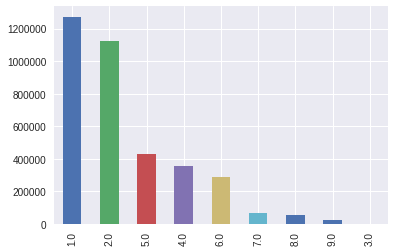

In [8]:
train.vas_id.value_counts().plot.bar()

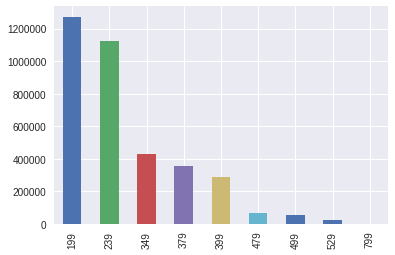

In [31]:
df.monthly_price_rur.value_counts().plot.bar()

In [47]:
df.head()

,id,vas_id,buy_time,target,monthly_price_rur
0,1803703,2.0,1539550800,0.0,239
1,2741595,2.0,1531688400,0.0,239
2,1671887,2.0,1544994000,0.0,239
3,4194020,2.0,1545598800,0.0,239
4,1033681,2.0,1535922000,0.0,239


##Распределение для каждой цены отдельно

799 - ни одного положительного отклика
379, 529 и 399 - больше всего положительных откликов 

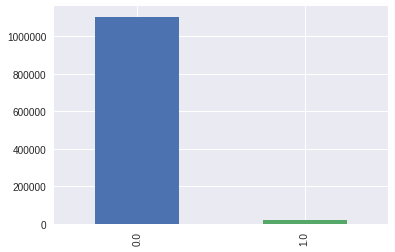

In [73]:
df[df['monthly_price_rur']==239].target.value_counts().plot.bar()

In [82]:
df.monthly_price_rur.unique()

array([239, 199, 379, 349, 399, 529, 499, 479, 799])

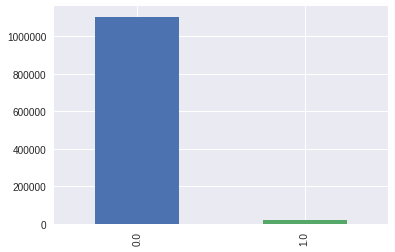

In [83]:
df[df['monthly_price_rur']==239].target.value_counts().plot.bar()

  

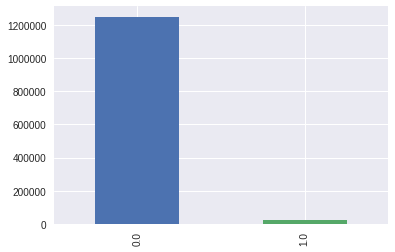

In [84]:
df[df['monthly_price_rur']==199].target.value_counts().plot.bar()

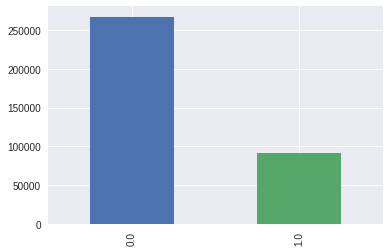

In [85]:
df[df['monthly_price_rur']==379].target.value_counts().plot.bar()

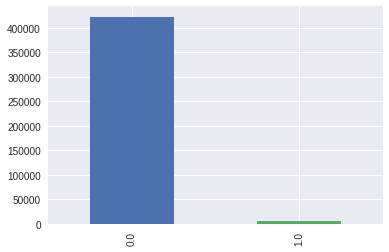

In [86]:
df[df['monthly_price_rur']==349].target.value_counts().plot.bar()

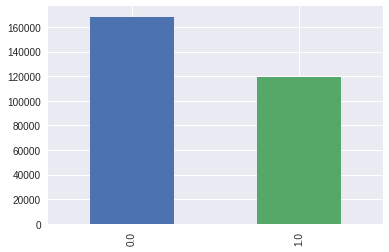

In [87]:
df[df['monthly_price_rur']==399].target.value_counts().plot.bar()

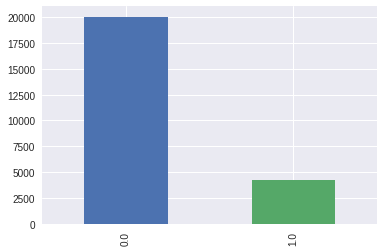

In [88]:
df[df['monthly_price_rur']==529].target.value_counts().plot.bar()

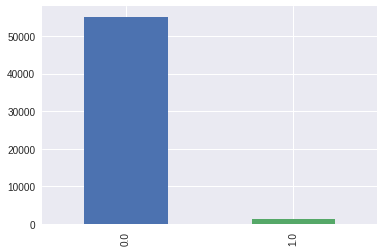

In [89]:
df[df['monthly_price_rur']==499].target.value_counts().plot.bar()

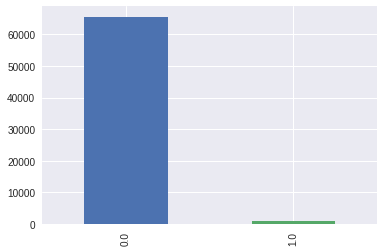

In [90]:
df[df['monthly_price_rur']==479].target.value_counts().plot.bar()

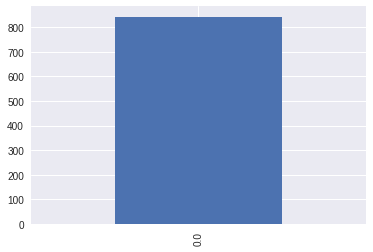

In [91]:
df[df['monthly_price_rur']==799].target.value_counts().plot.bar()

#Распределение по buy_time

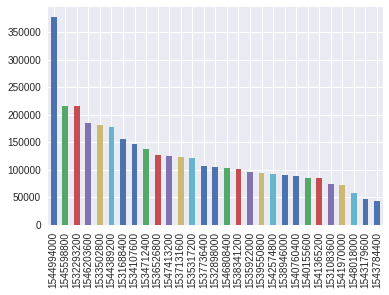

In [92]:
train.buy_time.value_counts().plot.bar()

In [93]:
train.buy_time.unique()

array([1539550800, 1534107600, 1541970000, 1542574800, 1531688400,
       1535922000, 1544994000, 1545598800, 1546808400, 1533502800,
       1540155600, 1540760400, 1534712400, 1536526800, 1537131600,
       1547413200, 1532293200, 1546203600, 1531083600, 1541365200,
       1538946000, 1544389200, 1535317200, 1532898000, 1543179600,
       1538341200, 1548018000, 1543784400, 1537736400])

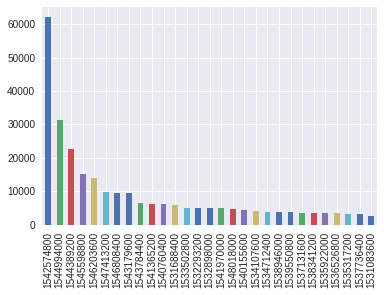

In [94]:
train[train['target']==1].buy_time.value_counts().plot.bar()

In [95]:
train[train['target']==1].buy_time.unique()

array([1542574800, 1539550800, 1534107600, 1533502800, 1534712400,
       1537131600, 1547413200, 1546203600, 1546808400, 1532293200,
       1544389200, 1540760400, 1531688400, 1532898000, 1543179600,
       1545598800, 1544994000, 1548018000, 1538341200, 1543784400,
       1540155600, 1535922000, 1538946000, 1541970000, 1531083600,
       1536526800, 1535317200, 1541365200, 1537736400])

In [0]:
df = pd.read_csv('drive/My Drive/СupIT_final/features.csv', sep='\t', nrows = 100000)

In [97]:
df.buy_time.unique()

array([1531688400, 1539550800, 1545598800, 1534107600, 1533502800,
       1544994000, 1537736400, 1544389200, 1536526800, 1535317200,
       1534712400, 1542574800, 1540760400, 1540155600, 1541365200,
       1537131600, 1531083600, 1538341200, 1532293200, 1546203600,
       1535922000, 1538946000, 1547413200, 1543784400, 1548018000,
       1541970000, 1532898000, 1546808400, 1543179600])

Features не сильно отличается от распределения в train

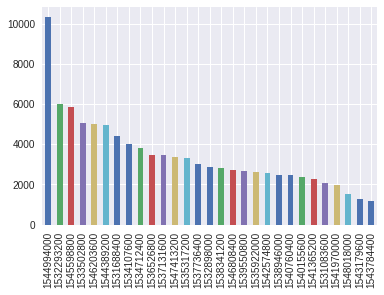

In [98]:
df.buy_time.value_counts().plot.bar()

#Поиск категориальных признаков

In [108]:
df.shape

(100000, 256)

Посчитаем количество уникальных значений для каждого feature

In [0]:
cat_of_features=[]
for i in range(1,253):
  cat_of_features.append((df[str(i)].unique().size,i))

In [188]:
cat_of_features

[(39996, 1),
 (20841, 2),
 (47304, 3),
 (21507, 4),
 (48399, 5),
 (2487, 6),
 (6707, 7),
 (5491, 8),
 (11344, 9),
 (915, 10),
 (5017, 11),
 (624, 12),
 (3876, 13),
 (10996, 14),
 (1, 15),
 (6, 16),
 (11, 17),
 (1514, 18),
 (1753, 19),
 (3823, 20),
 (1264, 21),
 (87, 22),
 (2, 23),
 (5, 24),
 (1284, 25),
 (2, 26),
 (2, 27),
 (13, 28),
 (6, 29),
 (5, 30),
 (2, 31),
 (2, 32),
 (2, 33),
 (828, 34),
 (7, 35),
 (672, 36),
 (4220, 37),
 (76883, 38),
 (67501, 39),
 (53993, 40),
 (6148, 41),
 (3806, 42),
 (32540, 43),
 (22119, 44),
 (24321, 45),
 (6443, 46),
 (47981, 47),
 (12490, 48),
 (26917, 49),
 (532, 50),
 (640, 51),
 (812, 52),
 (425, 53),
 (308, 54),
 (402, 55),
 (176, 56),
 (2, 57),
 (331, 58),
 (80, 59),
 (101, 60),
 (101, 61),
 (62, 62),
 (100, 63),
 (100, 64),
 (7, 65),
 (405, 66),
 (71, 67),
 (2111, 68),
 (12, 69),
 (16, 70),
 (942, 71),
 (668, 72),
 (1284, 73),
 (1044, 74),
 (1, 75),
 (1975, 76),
 (5740, 77),
 (88, 78),
 (77, 79),
 (32, 80),
 (1, 81),
 (116, 82),
 (52, 83),
 (22, 

In [189]:
np.asarray(cat_of_features)

array([[39996,     1],
       [20841,     2],
       [47304,     3],
       [21507,     4],
       [48399,     5],
       [ 2487,     6],
       [ 6707,     7],
       [ 5491,     8],
       [11344,     9],
       [  915,    10],
       [ 5017,    11],
       [  624,    12],
       [ 3876,    13],
       [10996,    14],
       [    1,    15],
       [    6,    16],
       [   11,    17],
       [ 1514,    18],
       [ 1753,    19],
       [ 3823,    20],
       [ 1264,    21],
       [   87,    22],
       [    2,    23],
       [    5,    24],
       [ 1284,    25],
       [    2,    26],
       [    2,    27],
       [   13,    28],
       [    6,    29],
       [    5,    30],
       [    2,    31],
       [    2,    32],
       [    2,    33],
       [  828,    34],
       [    7,    35],
       [  672,    36],
       [ 4220,    37],
       [76883,    38],
       [67501,    39],
       [53993,    40],
       [ 6148,    41],
       [ 3806,    42],
       [32540,    43],
       [221

In [0]:
cat = pd.DataFrame(np.asarray(cat_of_features))

In [191]:
cat.head()

,0,1
0,39996,1
1,20841,2
2,47304,3
3,21507,4
4,48399,5


In [193]:
cat.shape

(252, 2)

Посмотрим на признаки, где уникальных фич меньше тысячи

In [202]:
cat[cat[0] < 8].shape

(40, 2)

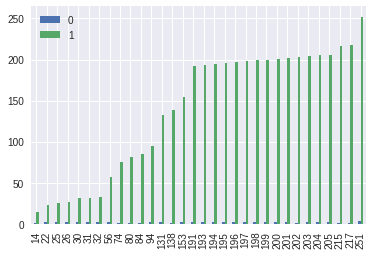

In [208]:
cat[cat[0] < 5].plot.bar()

#Удаляем кореллирующие признаки

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns



In [0]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix

In [0]:
np.random.seed(123)

In [9]:
%%time
corr = df.corr()

CPU times: user 15.5 s, sys: 173 ms, total: 15.7 s
Wall time: 15.7 s


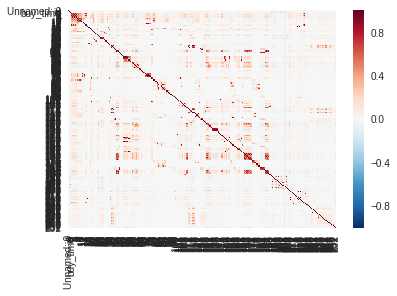

In [162]:
sns.heatmap(corr)

In [0]:
columns = np.full((corr.shape[0],), True, dtype=bool)
for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[0]):
        if corr.iloc[i,j] >= 0.8:
            if columns[j]:
                columns[j] = False
selected_columns = df.columns[columns]
newdf = df[selected_columns]

In [11]:
newdf.shape

(100000, 183)

In [0]:
m = newdf.columns.values

In [14]:
m

array(['Unnamed: 0', 'id', 'buy_time', '0', '1', '6', '7', '9', '10',
       '11', '12', '15', '16', '18', '19', '20', '21', '22', '23', '24',
       '25', '26', '27', '28', '31', '32', '34', '36', '37', '38', '39',
       '41', '42', '43', '46', '47', '48', '49', '50', '54', '56', '57',
       '58', '59', '60', '61', '62', '64', '65', '66', '67', '68', '69',
       '70', '73', '74', '75', '76', '77', '78', '80', '81', '82', '83',
       '84', '85', '86', '89', '90', '91', '93', '94', '95', '96', '97',
       '98', '99', '100', '101', '102', '103', '105', '106', '107', '109',
       '110', '111', '114', '115', '118', '119', '122', '126', '127',
       '128', '129', '130', '131', '132', '133', '134', '135', '136',
       '139', '140', '141', '143', '145', '148', '149', '150', '152',
       '153', '156', '157', '158', '159', '160', '161', '163', '164',
       '165', '167', '173', '174', '175', '177', '179', '181', '189',
       '191', '192', '193', '194', '195', '196', '197', '199', '200

In [19]:
newdf.head()

,Unnamed: 0,id,buy_time,0,1,6,7,9,10,11,...,242,243,245,246,247,248,249,250,251,252
0,0,2013026,1531688400,18.910029,46.980888,-16.08618,-65.076097,-30.006538,-2.736081,-4.007526,...,-17.295406,-977.373846,-25.996269,-37.630448,-301.747724,-25.832889,-0.694428,-12.175933,-0.45614,0.0
1,1,2014722,1539550800,36.690029,152.400888,-16.08618,-53.216097,-26.544905,-2.736081,-4.007526,...,-5.295406,-891.373846,-20.996269,48.369552,80.252276,-13.832889,-0.694428,-1.175933,-0.45614,0.0
2,2,2015199,1545598800,-67.019971,157.050888,3.51382,25.183903,-1.689642,-2.736081,9.226737,...,-17.295406,-977.373846,-12.996269,-37.630448,10829.252276,-25.832889,-0.694428,-12.175933,-0.45614,0.0
3,3,2021765,1534107600,7.010029,150.200888,-16.08618,-65.076097,-30.006538,-2.736081,-4.007526,...,-17.295406,-973.373846,-23.996269,-37.630448,-205.747724,-24.832889,-0.694428,-11.175933,-0.45614,1.0
4,4,2027465,1533502800,-90.439971,134.220888,-16.08618,-65.076097,-30.006538,-2.736081,-4.007526,...,105.704594,1643.626154,206.003731,-21.630448,6667.252276,92.167111,-0.694428,49.824067,47.54386,0.0


In [0]:
xtrain = train.merge(newdf, left_on='id', right_on='id')

In [21]:
xtrain.shape

(82894, 186)

In [22]:
xtrain.head()

,id,vas_id,buy_time_x,target,Unnamed: 0,buy_time_y,0,1,6,7,...,242,243,245,246,247,248,249,250,251,252
0,990392,6.0,1544994000,0.0,70252,1538946000,-96.799971,-242.929112,-16.08618,-65.076097,...,-17.295406,-966.373846,-25.996269,-4.630448,-211.747724,-19.832889,-0.694428,-9.175933,2.54386,1.0
1,1979749,2.0,1533502800,0.0,15930,1542574800,-63.759971,-242.989112,9.33382,23.893903,...,-17.295406,-977.373846,-25.996269,-37.630448,-306.747724,-25.832889,-0.694428,-12.175933,-0.45614,0.0
2,2852247,6.0,1546808400,1.0,96703,1535317200,206.620029,448.790888,61.05382,232.463903,...,-17.295406,287.626154,-10.996269,-19.630448,-184.747724,-14.832889,-0.694428,-1.175933,-0.45614,1.0
3,2634750,6.0,1544389200,1.0,28518,1544389200,-96.799971,-71.309112,-16.08618,-65.076097,...,-17.295406,-977.373846,-25.996269,-36.630448,-256.747724,-23.832889,-0.694428,-12.175933,-0.45614,0.0
4,2871863,1.0,1537131600,0.0,215,1537131600,23.340029,58.970888,-16.08618,-65.076097,...,-17.295406,-977.373846,-25.996269,-37.630448,-306.747724,-25.832889,-0.694428,-12.175933,-0.45614,1.0


In [0]:
target = 

In [0]:
selected_columns = selected_columns[1:].values
import statsmodels.formula.api as sm
def backwardElimination(x, Y, sl, columns):
    numVars = len(x[0])
    for i in range(0, numVars):
        regressor_OLS = sm.OLS(Y, x).fit()
        maxVar = max(regressor_OLS.pvalues).astype(float)
        if maxVar > sl:
            for j in range(0, numVars - i):
                if (regressor_OLS.pvalues[j].astype(float) == maxVar):
                    x = np.delete(x, j, 1)
                    columns = np.delete(columns, j)
                    
    regressor_OLS.summary()
    return x, columns
SL = 0.05
data_modeled, selected_columns = backwardElimination(data.iloc[:,1:].values, data.iloc[:,0].values, SL, selected_columns)

In [0]:
fields = np.concatenate((np.array(['id', 'buy_time']), m))

In [0]:
df = pd.read_csv('drive/My Drive/СupIT_final/features.csv', sep='\t', usecols=fields)